|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |

#### Bibliotecas

In [216]:
import numpy as np
from prettytable import PrettyTable, TableStyle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

#### Ajuste dos dados

In [217]:
dados = np.fromfile('rna-2025.1-pp2.1-dados/dataHoldout.txt')

In [218]:
m = dados.size//3
dados = dados.reshape((m,1,3))

In [219]:
X = np.array([[linha[0][0], linha[0][1]] for linha in dados])
y = np.array([[linha[0][2]] for linha in dados]).ravel()

#### Gráfico do Problema Não-Linearmente Separável

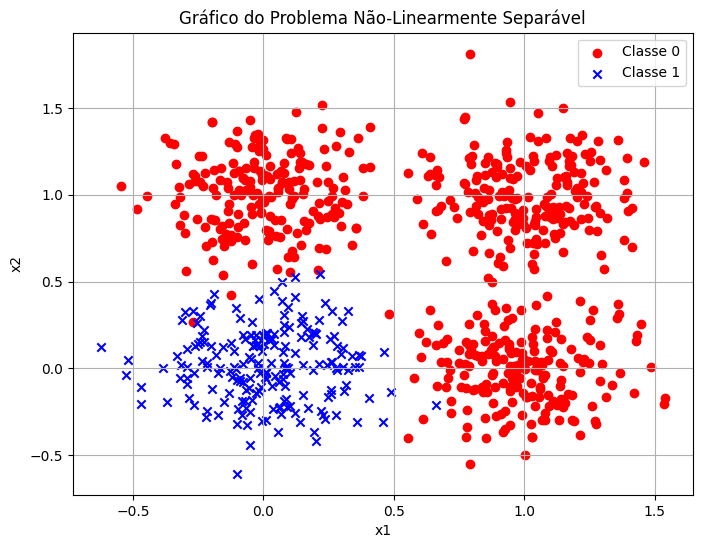

In [220]:
# Separar os pontos por classe
X0 = X[y == 0]
X1 = X[y == 1]

plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], color='red', marker='o', label='Classe 0')
plt.scatter(X1[:, 0], X1[:, 1], color='blue', marker='x', label='Classe 1')

plt.title("Gráfico do Problema Não-Linearmente Separável")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

#### Partição Holdout 70/30

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)


#### Perceptron

In [222]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100, weights=None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = weights
        self.bias = None
        self.necessary_epochs = None
        self.total_adjust = 0
    
    def step(self, x):
        return 1 if x >= 0 else 0

    def check_error(self, y_predicted, y):
        return y_predicted != y

    def fit(self, X, y):
        if self.weights is None:
            self.weights = np.random.uniform(low=-0.5, high=0.5, size=X.shape[1])
        self.bias = 0
        self.necessary_epochs = 0

        for epoch in range(self.epochs):
            self.necessary_epochs += 1
            error_counter = 0

            # Embaralhando os exemplos do conjunto de treinamento a cada época:
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for idx, x_i in enumerate(X_shuffled):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)

                if self.check_error(y_predicted, y_shuffled[idx]):
                    update = self.learning_rate * (y_shuffled[idx] - y_predicted)
                    self.weights += update * x_i
                    self.bias += update
                    error_counter += 1
                    self.total_adjust += 1

            if error_counter == 0:
                return

    def predict(self, X):
        return np.array([self.step(np.dot(x_i, self.weights) + self.bias) for x_i in X])


In [223]:
modelo = Perceptron()
modelo.fit(X_train, y_train)

In [224]:
y_pred = modelo.predict(X_test)

#### 1 - Matriz de Confusão (conjunto de testes)

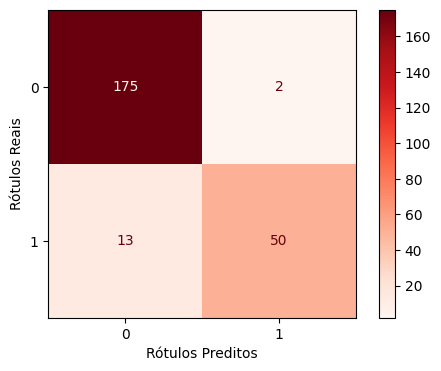

In [225]:
fig, axs = plt.subplots(figsize = (6, 4))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = axs, cmap="Reds", display_labels=[0, 1])

axs.set_xlabel("Rótulos Preditos", fontsize = 10)
axs.set_ylabel("Rótulos Reais", fontsize = 10)

axs.tick_params(axis = 'both', labelsize = 10)

plt.show()

#### 2 - Acurácia (conjunto de treinamento)

In [226]:
y_train_pred = modelo.predict(X_train)

acuracia_treinamento = accuracy_score(y_train, y_train_pred)

print(f"Acurácia no conjunto de treinamento: {acuracia_treinamento * 100:.1f}%")

Acurácia no conjunto de treinamento: 95.5%


#### 3 - Precisão, Revocação e F1-Score (conjunto de treinamento)

In [227]:
precisao_testes = precision_score(y_test, y_pred)
revocacao_testes = recall_score(y_test, y_pred)
f1_testes = f1_score(y_test, y_pred)

print(f"Precisão: {precisao_testes * 100:.1f}%")
print(f"Revocação: {revocacao_testes * 100:.1f}%")
print(f"F1-Score: {f1_testes * 100:.1f}%")

Precisão: 96.2%
Revocação: 79.4%
F1-Score: 87.0%


#### 4 - Argumentação sobre a Qualidade da Solução Perante o Conjunto de Testes

 A alta precisão

#### Gráficos com a solução obtida pelo neurônio Perceptron (Conjunto de Treinamento x Conjunto de Testes)

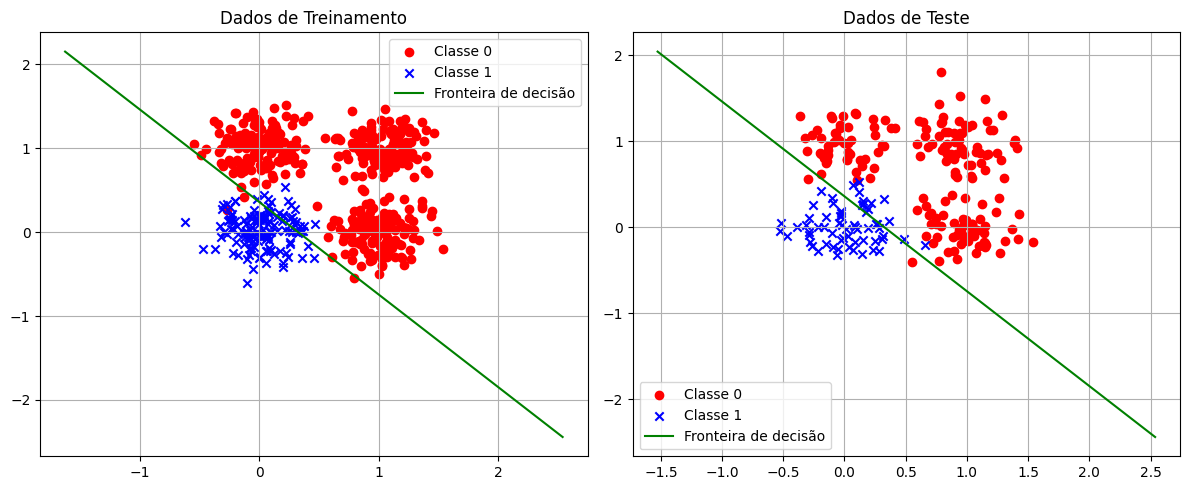

In [228]:
def perceptron_solution(axs, perceptron, X, y, title):
    X0 = X[y == 0]
    X1 = X[y == 1]

    # Plotar bolinha vermelha para classe 0
    axs.scatter(X0[:, 0], X0[:, 1], c='red', marker='o', label='Classe 0')

    # Plotar X azul para classe 1
    axs.scatter(X1[:, 0], X1[:, 1], c='blue', marker='x', label='Classe 1')
    
    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    if perceptron.weights[1] != 0: 
        y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
        axs.plot(x_vals, y_vals,color = 'green', label="Fronteira de decisão")

    axs.set_title(title)
    axs.legend()
    axs.grid(True)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

perceptron_solution(axs[0], modelo, X_train, y_train, "Dados de Treinamento")
perceptron_solution(axs[1], modelo, X_test, y_test, "Dados de Teste")

plt.tight_layout()
plt.show()